# **Outline**
#### **Astro Objects**
We define a class of messier objects including their common name, ra, dec, a link to a public commons image, and the apparent angular resolution in  square arcseconds

#### **Telescopes List**
We define a telescope and eye piece class

Create a list common telescopes and eyepieces

The class contains the telescope's focal length, the eyepiece's fov, and the eyepiece's focal length

#### **Height in the sky**
Calculate the Alt Az for a given object

User specifies the object from the class, user's latitude and longitude, date and time, UTC offset

Calculate the Alt Az based on position, date + time, and RA + DEC

Output Altitude in sky based on time

#### **Plots**

Call height in sky for 24 hours starting at User's noon to the following day at noon

Make a plot of object's height in sky over given 24 hour period

Call height in sky for 1 year starting at the first of the month

Make a plot of object's height in sky at midnight over following year

#### **% of Sky Taken Up by Object**

User specifies the telescope and eyepiece used

Calculate the square arcseconds that given setup covers in the sky

Calculate the percent of the field of view is taken up by a given astronomical object, defined in astronomical object class


#### **AI Integration**
Prompt AI and define our tools as height in sky suite and percentage observed tools

User passes their desired object and either latitude/longitude/date/time/UTC offset, or telescope eyepiece setup information

AI uses predefined functions to perform tasks asked by user and returns the given information as well as an image of the object they requested, as defined in the astronomical object class.


#### **AI Usage**
AI was used through out this project to help identify potential external functions that we could use for this project and to assist with debugging code.

# **Imports**

In [1]:
# Imports necessary for the project
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time
from datetime import datetime, timedelta
import astropy.units as u
import matplotlib.pyplot as plt
from PIL import Image
from urllib.request import Request, urlopen
import numpy as np
import json
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="pydantic")
from dotenv import load_dotenv
load_dotenv()
import litellm
import os

# **Object Definition**

In [2]:
#defines a class of astronomical objects with their common name, right ascension, declination, a link to a public commons image, as well as the apparent angular resolution in square arcseconds
class AstroObject:
    def __init__(self, name, ra_deg, dec_deg, image_url, angular_size):
        self.name = name
        self.ra = ra_deg
        self.dec = dec_deg
        self.image_url = image_url
        self.angular_size = angular_size
#defines a function that returns the ra and dec of the object
    def get_coords(self):
        return (self.ra, self.dec)
#defines a function that returns the angular size of the object
    def get_angular_size(self):
        return self.angular_size

In [ ]:
#credit for this info goes to Wikipedia at https://en.wikipedia.org/wiki/Messier_object
messier_1 = AstroObject("Crab Nebula", 83.633, 22.0145,
"https://upload.wikimedia.org/wikipedia/commons/0/00/Crab_Nebula.jpg",
121800)

messier_2 = AstroObject("M2 Globular Cluster", 323.3625, -0.8233,
"https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/Messier2_-_HST_-_Potw1913a.jpg/1280px-Messier2_-_HST_-_Potw1913a.jpg",
723822)

messier_3 = AstroObject("M3 Globular Cluster", 205.5483, 28.3773,
"https://upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Messier3_-_HST_-_Potw1914a.jpg/1280px-Messier3_-_HST_-_Potw1914a.jpg",
916088)

messier_4 = AstroObject("Spider Globular Cluster", 245.8967, -26.5258,
"https://upload.wikimedia.org/wikipedia/commons/thumb/9/90/Globular_star_cluster_Messier_4.jpg/1280px-Globular_star_cluster_Messier_4.jpg",
1911344)

messier_5 = AstroObject("Rose Cluster", 229.6383, 2.0810,
"https://upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Messier_5_-_HST.jpg/1280px-Messier_5_-_HST.jpg",
1495712)

messier_6 = AstroObject("Butterfly Cluster", 265.025, -32.2167,
"https://upload.wikimedia.org/wikipedia/commons/7/7f/M6a.jpg",
1767145)

messier_7 = AstroObject("Ptolemy Cluster", 268.4633, -34.7928,
"https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/The_star_cluster_Messier_7.jpg/1280px-The_star_cluster_Messier_7.jpg",
18095573)

messier_8 = AstroObject("Lagoon Nebula", 270.9042, -24.3867,
"https://upload.wikimedia.org/wikipedia/commons/7/76/LagoonHunterWilson.jpg",
12960000)

messier_9 = AstroObject("M9 Globular Cluster", 259.7992, -18.5163,
"https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Globular_cluster_Messier_9_%28captured_by_the_Hubble_Space_Telescope%29.tif/lossy-page1-768px-Globular_cluster_Messier_9_%28captured_by_the_Hubble_Space_Telescope%29.tif.jpg",
244544)

messier_10 = AstroObject("M10 Globular Cluster", 254.2871, -4.0995,
"https://upload.wikimedia.org/wikipedia/commons/thumb/6/67/Messier_10_Hubble_WikiSky.jpg/1280px-Messier_10_Hubble_WikiSky.jpg",
1130973)

messier_11 = AstroObject("Wild Duck Cluster", 282.775, -6.2667,
"https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Eso1430a.jpg/1280px-Eso1430a.jpg",
1469812)

messier_12 = AstroObject("M12 Globular Cluster", 251.8092, -1.9485,
"https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/M12_Hubble.jpg/1280px-M12_Hubble.jpg",
723822)

messier_13 = AstroObject("Great Hercules Cluster", 250.4217, 36.4599,
"https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Messier_13_Hubble_WikiSky.jpg/1280px-Messier_13_Hubble_WikiSky.jpg",
113073)

messier_14 = AstroObject("M14 Globular Cluster", 264.4008, -3.2459,
"https://upload.wikimedia.org/wikipedia/commons/b/b2/Messier_object_014.jpg",
342119)

messier_15 = AstroObject("Great Pegasus Cluster", 322.493, 12.167,
"https://upload.wikimedia.org/wikipedia/commons/thumb/6/65/Messier_15_Hubble_WikiSky.jpg/1280px-Messier_15_Hubble_WikiSky.jpg",
916088)

messier_16 = AstroObject("Eagle Nebula", 274.700, -13.817,
"https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Eagle_Nebula_from_ESO.jpg/1280px-Eagle_Nebula_from_ESO.jpg",
12600000)

messier_17 = AstroObject("Omega Nebula", 275.1083, -16.1767,
"https://upload.wikimedia.org/wikipedia/commons/thumb/9/90/The_star_formation_region_Messier_17.jpg/1280px-The_star_formation_region_Messier_17.jpg",
342119)

messier_18 = AstroObject("Black Swan Cluster", 274.975, -17.1333,
"https://upload.wikimedia.org/wikipedia/commons/c/c8/Messier18.jpg",
271546)

messier_19 = AstroObject("M19 Globular Cluster", 255.6571, -26.2679,
"https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Messier_19_Hubble_WikiSky.jpg/1280px-Messier_19_Hubble_WikiSky.jpg",
817128)

messier_20 = AstroObject("Trifid Nebula", 270.5958, -23.0300,
"https://upload.wikimedia.org/wikipedia/commons/f/f3/Trifid.nebula.arp.750pix.jpg",
2216707)

messier_21 = AstroObject("Webb Cross Cluster", 271.150, -22.500,
"https://upload.wikimedia.org/wikipedia/commons/2/28/Messier_object_021.jpg",
554176)

messier_22 = AstroObject("Great Sagittarius Cluster", 279.0996, -23.9048,
"https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Messier_22_Hubble_WikiSky.jpg/1280px-Messier_22_Hubble_WikiSky.jpg",
2895291)

messier_23 = AstroObject("M23 Open Cluster", 269.200, -19.0167,
"https://upload.wikimedia.org/wikipedia/commons/6/63/Messier_object_023.jpg",
3463605)

messier_24 = AstroObject("Sagittarius Star Cloud", 274.250, -18.550,
"https://upload.wikimedia.org/wikipedia/commons/c/c4/Messier_24_Colombari_crop_invert.jpg",
25920000)

messier_25 = AstroObject("M25 Open Cluster", 277.900, -19.250,
"https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Messier_object_025.jpg/1280px-Messier_object_025.jpg",
3664353)

messier_26 = AstroObject("M26 Open Cluster", 281.300, -9.400,
"https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Messier_26.jpg/1280px-Messier_26.jpg",
554176)

messier_27 = AstroObject("Dumbbell Nebula", 299.9013, 22.7211,
"https://upload.wikimedia.org/wikipedia/commons/thumb/e/e8/M27_-_Dumbbell_Nebula.jpg/1280px-M27_-_Dumbbell_Nebula.jpg",
161280)

messier_28 = AstroObject("M28 Globular Cluster", 276.1371, -24.8698,
"https://upload.wikimedia.org/wikipedia/commons/thumb/f/f6/Nebulous%2C_but_no_nebula_Messier_28.jpg/1280px-Nebulous%2C_but_no_nebula_Messier_28.jpg",
354673)

messier_29 = AstroObject("Cooling Tower Cluster", 305.9833, 38.5233,
"https://upload.wikimedia.org/wikipedia/commons/a/aa/Messier_29.jpg",
138544)

messier_30 = AstroObject("Jellyfish Cluster", 325.0921, -23.1799,
"https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Messier_30_Hubble_WikiSky.jpg/1280px-Messier_30_Hubble_WikiSky.jpg",
407150)

messier_31 = AstroObject("Andromeda Galaxy", 10.6846, 41.2692,
"https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/Andromeda_Galaxy_%28with_h-alpha%29.jpg/1280px-Andromeda_Galaxy_%28with_h-alpha%29.jpg",
41083200)

messier_32 = AstroObject("Andromeda Satellite M32", 10.6742, 40.8653,
"https://upload.wikimedia.org/wikipedia/commons/8/83/M32_Lanoue.png",
203580)

messier_33 = AstroObject("Triangulum Galaxy", 23.4583, 30.6602,
"https://upload.wikimedia.org/wikipedia/commons/thumb/6/64/VST_snaps_a_very_detailed_view_of_the_Triangulum_Galaxy.jpg/1280px-VST_snaps_a_very_detailed_view_of_the_Triangulum_Galaxy.jpg",
10628496)

messier_34 = AstroObject("Spiral Cluster", 40.525, 42.7667,
"https://upload.wikimedia.org/wikipedia/commons/7/7e/M34_2mass_atlas.jpg",
3463605)

messier_35 = AstroObject("Shoe Buckle Cluster", 92.275, 24.350,
"https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/M35atlas.jpg/1280px-M35atlas.jpg",
2216707)

messier_36 = AstroObject("Pinwheel Cluster", 84.050, 34.1344,
"https://upload.wikimedia.org/wikipedia/commons/3/3d/M36a.jpg",
407150)

messier_37 = AstroObject("Salt and Pepper Cluster", 88.075, 32.5506,
"https://upload.wikimedia.org/wikipedia/commons/4/46/M37a.jpg",
1628601)

messier_38 = AstroObject("Starfish Cluster", 82.175, 35.855,
"https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/M38_Open_Cluster.jpg/1280px-M38_Open_Cluster.jpg",
1246898)

messier_39 = AstroObject("Pyramid Cluster", 322.925, 48.4333,
"https://upload.wikimedia.org/wikipedia/commons/thumb/6/67/M39atlas.jpg/677px-M39atlas.jpg",
2377871)

messier_40 = AstroObject("Winnecke 4", 185.5521, 58.0831,
"https://upload.wikimedia.org/wikipedia/commons/b/ba/Messier_object_40.jpg",
2099)

messier_41 = AstroObject("Little Beehive Cluster", 101.500, -20.7667,
"https://upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Messier_041_2MASS.jpg/960px-Messier_041_2MASS.jpg",
4082813)

messier_42 = AstroObject("Great Orion Nebula", 83.8221, -5.3911,
"https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg/1280px-Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg",
14040000)

messier_43 = AstroObject("De Mairan Nebula", 83.900, -5.2667,
"https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/M43_HST.jpg/1280px-M43_HST.jpg",
1080000)

messier_44 = AstroObject("Beehive Cluster", 130.100, 19.9833,
"https://upload.wikimedia.org/wikipedia/commons/thumb/9/94/Messier_44_2018.jpg/1280px-Messier_44_2018.jpg",
25517586)

messier_45 = AstroObject("Pleiades", 56.850, 24.1167,
"https://upload.wikimedia.org/wikipedia/commons/4/4b/Bob_Star_-_M45_Carranza_Field_%28by%29.jpg",
40715040)

messier_46 = AstroObject("M46 Open Cluster", 115.450, -14.8167,
"https://upload.wikimedia.org/wikipedia/commons/0/0b/M46a.jpg",
1469812)

messier_47 = AstroObject("M47 Open Cluster", 114.150, -14.500,
"https://upload.wikimedia.org/wikipedia/commons/5/55/M47a.jpg",
2544690)

messier_48 = AstroObject("M48 Open Cluster", 123.425, -5.750,
"https://upload.wikimedia.org/wikipedia/commons/6/66/M48a.jpg",
2544690)

messier_49 = AstroObject("M49 Galaxy", 187.4446, 8.0006,
"https://upload.wikimedia.org/wikipedia/commons/thumb/2/29/Messier_49_Hubble_WikiSky.jpg/1280px-Messier_49_Hubble_WikiSky.jpg",
304776)

messier_50 = AstroObject("Heart Shaped Cluster", 105.800, -8.3333,
"https://upload.wikimedia.org/wikipedia/commons/3/3b/M50a.jpg",
723822)

messier_51 = AstroObject("Whirlpool Galaxy", 202.4696, 47.1953,
"https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Messier51_sRGB.jpg/1280px-Messier51_sRGB.jpg",
278208)

messier_52 = AstroObject("Scorpion Cluster", 351.050, 61.5833,
"https://upload.wikimedia.org/wikipedia/commons/b/bc/M52atlas.jpg",
477836)

messier_53 = AstroObject("M53 Globular Cluster", 198.2304, 18.1682,
"https://upload.wikimedia.org/wikipedia/commons/5/5f/Globular_Cluster_M53.jpg",
477836)

messier_54 = AstroObject("M54 Globular Cluster", 283.7638, -30.4799,
"https://upload.wikimedia.org/wikipedia/commons/7/75/Messier54.jpg",
407150)

messier_55 = AstroObject("Specter Cluster", 295.9988, -30.9648,
"https://upload.wikimedia.org/wikipedia/commons/a/a2/Messier55.jpg",
1020703)

messier_56 = AstroObject("M56 Globular Cluster", 289.1483, 30.1835,
"https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/M56-LRGB.jpg/1280px-M56-LRGB.jpg",
218956)

messier_57 = AstroObject("Ring Nebula", 283.3963, 33.0292,
"https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/M57_The_Ring_Nebula.JPG/1215px-M57_The_Ring_Nebula.JPG",
52900)

messier_58 = AstroObject("M58 Galaxy", 189.4313, 11.8181,
"https://upload.wikimedia.org/wikipedia/commons/b/b0/M58s_%28visible%29.jpg",
99828)

messier_59 = AstroObject("M59 Galaxy", 190.5096, 11.6470,
"https://upload.wikimedia.org/wikipedia/commons/thumb/8/8f/Messier59_-_HST_-_Potw1921a.jpg/1280px-Messier59_-_HST_-_Potw1921a.jpg",
71928)

messier_60 = AstroObject("M60 Galaxy", 190.9150, 11.5525,
"https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Messier_60_Hubble_WikiSky.jpg/1280px-Messier_60_Hubble_WikiSky.jpg",
159840)

messier_61 = AstroObject("M61 Galaxy", 185.4788, 4.4736,
"https://upload.wikimedia.org/wikipedia/commons/thumb/9/9a/M61_-_SDSS_DR14.jpg/1280px-M61_-_SDSS_DR14.jpg",
135720)

messier_62 = AstroObject("M62 Globular Cluster", 255.3033, -30.1137,
"https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Messier62.jpg/1280px-Messier62.jpg",
636172)

messier_63 = AstroObject("Sunflower Galaxy", 198.9554, 42.0293,
"https://upload.wikimedia.org/wikipedia/commons/thumb/b/b3/M63_NGC5055_Galaxy.jpg/1280px-M63_NGC5055_Galaxy.jpg",
326592)

messier_64 = AstroObject("Black Eye Galaxy", 194.1821, 21.6830,
"https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/M64.jpg/1280px-M64.jpg",
192452)

messier_65 = AstroObject("M65 Galaxy", 169.7325, 13.0922,
"https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/M65.jpg/1280px-M65.jpg",
78300)

messier_66 = AstroObject("M66 Galaxy", 170.0624, 12.9915,
"https://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/Phot-33c-03-fullres.jpg/960px-Phot-33c-03-fullres.jpg",
137592)

messier_67 = AstroObject("King Cobra Cluster", 132.825, 11.8167,
"https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/M67atlas.jpg/1280px-M67atlas.jpg",
2544690)

messier_68 = AstroObject("M68 Globular Cluster", 189.8667, -26.7441,
"https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/M68.jpg/1280px-M68.jpg",
342119)

messier_69 = AstroObject("M69 Globular Cluster", 277.8463, -32.3481,
"https://upload.wikimedia.org/wikipedia/commons/8/8e/Messier69.jpg",
329791)

messier_70 = AstroObject("M70 Globular Cluster", 280.8025, -32.2920,
"https://upload.wikimedia.org/wikipedia/commons/2/2b/Messier70.jpg",
180955)

messier_71 = AstroObject("M71 Globular Cluster", 298.4437, 18.7792,
"https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/M71.jpg/1280px-M71.jpg",
146574)

messier_72 = AstroObject("M72 Globular Cluster", 313.3654, -12.5373,
"https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Messier72.jpg/1280px-Messier72.jpg",
123162)

messier_73 = AstroObject("M73 Asterism", 314.7504, -12.6333,
"https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/M73_2MASS.jpg/1280px-M73_2MASS.jpg",
22167)

messier_74 = AstroObject("Phantom Galaxy", 24.1742, 15.7836,
"https://upload.wikimedia.org/wikipedia/commons/thumb/7/70/M74_-_NGC_628.jpg/1280px-M74_-_NGC_628.jpg",
359100)

messier_75 = AstroObject("M75 Globular Cluster", 301.5208, -21.9222,
"https://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/M75.jpg/1280px-M75.jpg",
130740)

messier_76 = AstroObject("Little Dumbbell Nebula", 25.600, 51.5753,
"https://upload.wikimedia.org/wikipedia/commons/f/f0/M76-RL5-DDmin-Gamma-LRGB_883x628.jpg",
17496)

messier_77 = AstroObject("Cetus A Galaxy", 40.6696, -0.0133,
"https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Messier_77_spiral_galaxy_by_HST.jpg/1280px-Messier_77_spiral_galaxy_by_HST.jpg",
153360)

messier_78 = AstroObject("M78 Nebula", 86.6946, 0.0139,
"https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Messier_78.jpg/1280px-Messier_78.jpg",
172800)

messier_79 = AstroObject("M79 Globular Cluster", 81.0442, -24.5243,
"https://upload.wikimedia.org/wikipedia/commons/a/ae/M79a.jpg",
214008)

messier_80 = AstroObject("M80 Globular Cluster", 244.2600, -22.9761,
"https://upload.wikimedia.org/wikipedia/commons/thumb/6/6a/A_Swarm_of_Ancient_Stars_-_GPN-2000-000930.jpg/1280px-A_Swarm_of_Ancient_Stars_-_GPN-2000-000930.jpg",
282743)

messier_81 = AstroObject("Bode Galaxy", 148.8883, 69.0653,
"https://upload.wikimedia.org/wikipedia/commons/thumb/8/8b/M81.jpg/1280px-M81.jpg",
1365444)

messier_82 = AstroObject("Cigar Galaxy", 148.9675, 69.6797,
"https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/JPEG_M82_Cigar_Galaxyjn.jpg/1280px-JPEG_M82_Cigar_Galaxyjn.jpg",
173376)

messier_83 = AstroObject("Southern Pinwheel Galaxy", 204.2538, -29.8658,
"https://upload.wikimedia.org/wikipedia/commons/thumb/8/85/M83_-_Southern_Pinwheel.jpg/1280px-M83_-_Southern_Pinwheel.jpg",
534060)

messier_84 = AstroObject("M84 Galaxy", 186.2654, 12.8870,
"https://upload.wikimedia.org/wikipedia/commons/7/7a/Messier_84_nucleus_Hubble.jpg",
131040)

messier_85 = AstroObject("M85 Galaxy", 186.3500, 18.1911,
"https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/Messier_85_Hubble_WikiSky.jpg/1280px-Messier_85_Hubble_WikiSky.jpg",
140580)

messier_86 = AstroObject("M86 Galaxy", 186.5488, 12.9461,
"https://upload.wikimedia.org/wikipedia/commons/thumb/e/e5/Messier_86_Hubble_WikiSky.jpg/1280px-Messier_86_Hubble_WikiSky.jpg",
185832)

messier_87 = AstroObject("Virgo A Galaxy", 187.7058, 12.3911,
"https://upload.wikimedia.org/wikipedia/commons/thumb/0/07/Messier_87_Hubble_WikiSky.jpg/1280px-Messier_87_Hubble_WikiSky.jpg",
176256)

messier_88 = AstroObject("M88 Galaxy", 187.9967, 14.4206,
"https://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/M88s.jpg/1280px-M88s.jpg",
91908)

messier_89 = AstroObject("M89 Galaxy", 188.9158, 12.5564,
"https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Messier89_-_HST_-_Potw1902a.tif/lossy-page1-1199px-Messier89_-_HST_-_Potw1902a.tif.jpg",
86292)

messier_90 = AstroObject("M90 Galaxy", 189.2075, 13.1628,
"https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Messier90_-_SDSS_DR14_%28panorama%29.jpg/1280px-Messier90_-_SDSS_DR14_%28panorama%29.jpg",
150480)

messier_91 = AstroObject("M91 Galaxy", 188.8600, 14.4964,
"https://upload.wikimedia.org/wikipedia/commons/thumb/9/9d/M91s.jpg/1280px-M91s.jpg",
83592)

messier_92 = AstroObject("M92 Globular Cluster", 259.281, 43.1359,
"https://upload.wikimedia.org/wikipedia/commons/c/cb/Globular_Cluster_M92.JPG",
554176)

messier_93 = AstroObject("Critter Cluster", 116.150, -23.8667,
"https://upload.wikimedia.org/wikipedia/commons/f/f0/Messier_object_093.jpg",
282743)

messier_94 = AstroObject("Crocodile Eye Galaxy", 192.7213, 41.1206,
"https://upload.wikimedia.org/wikipedia/commons/1/1c/Messier_94.jpg",
366912)

messier_95 = AstroObject("M95 Galaxy", 160.9904, 11.7039,
"https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/The_VLT_goes_lion_hunting.jpg/1280px-The_VLT_goes_lion_hunting.jpg",
32364)

messier_96 = AstroObject("M96 Galaxy", 161.6904, 11.8200,
"https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/NGC_3368_ESO.jpg/1280px-NGC_3368_ESO.jpg",
142272)

messier_97 = AstroObject("Owl Nebula", 168.6988, 55.0190,
"https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/M97-stargazer-obs.jpg/1252px-M97-stargazer-obs.jpg",
40392)

messier_98 = AstroObject("M98 Galaxy", 183.4513, 14.9005,
"https://upload.wikimedia.org/wikipedia/commons/2/21/M-98.jpg",
98784)

messier_99 = AstroObject("St Catherine Wheel Galaxy", 184.7067, 14.4164,
"https://upload.wikimedia.org/wikipedia/commons/e/eb/M99.jpg",
91368)

messier_100 = AstroObject("Mirror Galaxy", 185.7288, 15.8225,
"https://upload.wikimedia.org/wikipedia/commons/thumb/9/94/Messier_100_and_Supernova_SN_2006X.jpg/1280px-Messier_100_and_Supernova_SN_2006X.jpg",
167832)

messier_101 = AstroObject("Pinwheel Galaxy", 210.8025, 54.3492,
"https://upload.wikimedia.org/wikipedia/commons/thumb/c/c5/M101_hires_STScI-PRC2006-10a.jpg/1280px-M101_hires_STScI-PRC2006-10a.jpg",
2788992)

messier_102 = AstroObject("Spindle Galaxy", 226.6229, 55.7633,
"https://upload.wikimedia.org/wikipedia/commons/thumb/9/91/Ngc5866_hst_big.png/1280px-Ngc5866_hst_big.png",
32148)

messier_103 = AstroObject("M103 Open Cluster", 23.300, 60.700,
"https://upload.wikimedia.org/wikipedia/commons/0/06/Messier_object_103.jpg",
101787)

messier_104 = AstroObject("Sombrero Galaxy", 189.9975, -11.6231,
"https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/M104_ngc4594_sombrero_galaxy_hi-res.jpg/1280px-M104_ngc4594_sombrero_galaxy_hi-res.jpg",
129600)

messier_105 = AstroObject("M105 Galaxy", 161.9567, 12.5817,
"https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Messier105_-_HST_-_Potw1901a.jpg/1280px-M105_-_HST_-_Potw1901a.jpg",
93312)

messier_106 = AstroObject("M106 Galaxy", 184.7396, 47.3039,
"https://upload.wikimedia.org/wikipedia/commons/thumb/2/2d/Messier_106_visible_and_infrared_composite.jpg/1280px-Messier_106_visible_and_infrared_composite.jpg",
482112)

messier_107 = AstroObject("Crucifix Cluster", 248.1329, -13.0538,
"https://upload.wikimedia.org/wikipedia/commons/a/a9/Messier_object_107.jpg",
282743)

messier_108 = AstroObject("Surfboard Galaxy", 167.8792, 55.6742,
"https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/Messier108_-_SDSS_DR_14_%28panorama%29.jpg/1280px-Messier108_-_SDSS_DR_14_%28panorama%29.jpg",
68904)

messier_109 = AstroObject("Vacuum Cleaner Galaxy", 179.4000, 53.3744,
"https://upload.wikimedia.org/wikipedia/commons/thumb/3/3d/Messier109_-_SDSS_DR14_%28panorama%29.jpg/1280px-Messier109_-_SDSS_DR14_%28panorama%29.jpg",
128592)

messier_110 = AstroObject("Andromeda Satellite M110", 10.0921, 41.6853,
"https://upload.wikimedia.org/wikipedia/commons/f/f7/Messier_object_110.jpg",
867240)

In [4]:
#defines a dictionary of astronomical objects with their names for ai integration
astro_objects = {
    f"messier_{i}": globals()[f"messier_{i}"]
    for i in range(1, 111)
    if f"messier_{i}" in globals()
}

# **Telescope & Eyepiece Definition**


In [5]:
#defines a telescope class with a name and focal length
class Telescope:
    def __init__(self, name, focal_length):
        self.name = name
        self.focal_length = focal_length
#defines a function that returns the focal length of the telescope
    def get_telescope_fov(self):
        return (self.focal_length)
#defines an eyepiece class with a name, focal length, and apparent field of view
class eye_piece:
    def __init__(self, name, focal_length, aFOV):
        self.name = name
        self.focal_length = focal_length
        self.aFOV = aFOV
#defines a function that returns the focal length of the eyepiece
    def get_eyepiece_focal_length(self):
        return (self.focal_length)
#defines a function that returns the apparent field of view of the eyepiece
    def get_eyepiece_fov(self):
        return (self.aFOV)

In [6]:
Telescope_250 = Telescope("Redcat 51 WIFD", 250)
Telescope_360 = Telescope("Zenithstar 61 II", 360)
Telescope_400 = Telescope("Meade ETX 80mm f/5", 400)
Telescope_500 = Telescope("Celestron Onyx 80EDF", 500)
Telescope_1242 = Telescope("Meade ETX 90 f/13.8", 1242)
Telescope_1250 = Telescope("Celestron C5 f/10", 1250)
Telescope_1900 = Telescope("Meade ETX 125 f/15", 1900)
Telescope_2000 = Telescope("Meade LX200 8in f/10", 2000)
Telescope_2023 = Telescope("Celestron C8 f/10", 2032)
Telescope_2500 = Telescope("Meade  LX200 10in f/10", 2500)
Telescope_2800 = Telescope("Celestron C11 f/10", 2800)
Telescope_3048 = Telescope("Meade  LX200 12in f/10", 3048)
Telescope_3556 = Telescope("Meade  LX200 14in f/10", 3556)
Telescope_3910 = Telescope("Celestron C14 f/11", 3910)
Telescope_4064 = Telescope("Meade  LX200 16in f/10", 4064)
#defines a dictionary of telescopes with their names for ai integration
telescopes = {
    "Redcat 51 WIFD": Telescope_250,
    "Zenithstar 61 I": Telescope_360,
    "Meade ETX 80mm f/5": Telescope_400,
    "Celestron Onyx 80EDF": Telescope_500,
    "Meade ETX 90 f/13.8": Telescope_1242,
    "Celestron C5 f/10": Telescope_1250,
    "Meade ETX 125 f/15": Telescope_1900,
    "Meade LX200 8in f/10": Telescope_2000,
    "Celestron C8 f/10": Telescope_2023,
    "Meade  LX200 10in f/10": Telescope_2500,
    "Celestron C11 f/10": Telescope_2800,
    "Meade  LX200 12in f/10": Telescope_3048,
    "Meade  LX200 14in f/10": Telescope_3556,
    "Celestron C14 f/1": Telescope_3910,
    "Meade  LX200 16in f/10": Telescope_4064,
}


In [7]:
eye_piece_40 = eye_piece("Plossl 40mm (43deg)", 40, 43)
eye_piece_31 = eye_piece("Nagler 31mm (82deg)", 32, 82)
eye_piece_30 = eye_piece("ES 30mm (100deg)", 30, 100)
eye_piece_26 = eye_piece("Plossl 26mm (52deg)", 26, 52)
eye_piece_14 = eye_piece("Plossl 14mm (50deg)", 14, 50)
eye_piece_125 = eye_piece("Celestron Micro Guide", 12.5, 42)
eye_piece_12 = eye_piece("Meade MA12 Astrometric", 12, 40)
eye_piece_10 = eye_piece("Celestron Luminos 10mm", 10, 82)
eye_piece_6 = eye_piece("Plossl 6mm (50deg)", 6, 50)
#defines a dictionary of eyepieces with their names for ai integration
eye_piece = {
    "Plossl 40mm (43deg)": eye_piece_40,
    "Nagler 31mm (82deg)": eye_piece_31,
    "ES 30mm (100deg)": eye_piece_30,
    "Plossl 26mm (52deg)": eye_piece_26,
    "Plossl 14mm (50deg)": eye_piece_14,
    "Celestron Micro Guide": eye_piece_125,
    "Meade MA12 Astrometric": eye_piece_12,
    "Celestron Luminos 10mm": eye_piece_10,
    "Plossl 6mm (50deg)": eye_piece_6,
}

# **Height Functions**

#### **Calculate Altitude**

We start by defining a function with inputs specified by the user. Internal to the function, these inputs are defined as: 

- Astronomical Object defined as obj
- Observation Date in MM/DD/YYYY format defined as obs_date
- Observation Time in 24 hour format (HH:MM:SS) defined as obs_time
- User's Latitude in degrees defined as latitude_deg
- User's Longitude in degrees defined as longitude_deg
- User's time zone in UTC offset (ex. -5 for EST) defined as utc_offset

We define a new variable local_dt which formats the user's date and time into a computer readable format. Then we take that time and subtract their UTC offset, giving us the time in UTC. 

We get the Right Ascension and Declination of the object and convert it using AstroPy's SkyCoord, formatting it correctly for a later function. Next we take their location and use AstroPy's EarthLocation to format it in a proper format for the Altitude Azimuth function.

We calculate the altitude and azimuth of the astronomical object at the specified date and time using the right ascension and declination as defined above. The function returns the altitude in degrees.

Next we define the function in an AI readable format, defining each of the inputs and the outputs so that the AI knows how to handle it, and append it to the list named tools.

In [8]:
tools = []
def calculate_altitude(obj, obs_date, obs_time, latitude_deg, longitude_deg, utc_offset):

    # Split date and time (optional, but explicit)
    # date_part, time_part = obs_time_str.split(" ")

    # Recombine safely and parse
    local_dt = datetime.strptime(
        f"{obs_date} {obs_time}",
        "%Y-%m-%d %H:%M:%S"
    )

    # Convert local time → UTC
    utc_dt = local_dt - timedelta(hours=utc_offset)
    time_obs = Time(utc_dt)
    # Get object coordinates
    ra, dec = obj.get_coords()

    sky_object = SkyCoord(
        ra=ra * u.deg,
        dec=dec * u.deg,
        frame="icrs"
    )

    location = EarthLocation(
        lat=latitude_deg * u.deg,
        lon=longitude_deg * u.deg,
        height=0 * u.m
    )

    altaz = sky_object.transform_to(
        AltAz(obstime=time_obs, location=location)
    )
    
    return altaz.alt.degree
tools.append(
    {
        "type": "function",
        "function": {
            "name": "calculate_altitude",
            "description": "Calculate altitude of an astronomical object above the horizon in degrees.",
            "parameters": {
                "type": "object",
                "properties": {
                    "obj": {
                        "type": "string",
                        "description": "Name of astronomical object variable (ex: messier_31)"
                    },
                    "obs_date": {
                        "type": "string",
                        "description": "Date in format YYYY-MM-DD"
                    },
                    "obs_time": {
                        "type": "string",
                        "description": "Local time in format HH:MM:SS"
                    },
                    "latitude_deg": {
                        "type": "number",
                        "description": "Observer latitude in degrees"
                    },
                    "longitude_deg": {
                        "type": "number",
                        "description": "Observer longitude in degrees"
                    },
                    "utc_offset": {
                        "type": "number",
                        "description": "Offset from UTC in hours"
                    }
                },
                "required": [
                    "obj",
                    "obs_date",
                    "obs_time",
                    "latitude_deg",
                    "longitude_deg",
                    "utc_offset"
                ]
            }
        }
    }
)

#### **Plot Altitude for 24 hours**

We start by defining a function with inputs specified by the user. Internal to the function, these inputs are defined as: 

- Astronomical Object defined as obj
- Observation Date in MM/DD/YYYY format defined as obs_date
- User's Latitude in degrees defined as latitude_deg
- User's Longitude in degrees defined as longitude_deg
- User's time zone in UTC offset (ex. -5 for EST) defined as utc_offset

We start by converting the user's date into a date and time that starts at noon on the given day. We then define how many times we loop through the function, to ensure the function efficiently runs. 

We create a list called altitudes. For each loop through the function, we run the calculate altitude function to calculate the altitude for the next interval of time, and append that to the altitudes list. 

We then plot the altitudes over the 24 hour period and set the x-axis such that it starts at 12 PM on the date of observation and ends at 12 PM the following day in 12 hour clock format. 

Finally,  we define the function in an AI readable format, defining each of the inputs and the outputs so that the AI knows how to handle it, and append it to the list named tools.

In [9]:
def plot_altitude_24hr(obj, date_str, latitude_deg, longitude_deg, utc_offset):

    start_local = datetime.strptime(date_str + " 12:00:00",
                                    "%Y-%m-%d %H:%M:%S")

    minutes = np.arange(0, 24*60 + 1, 5)
    hours = minutes / 60
    altitudes = []

    for m in minutes:
        current_local = start_local + timedelta(minutes=int(m))
        date_part = current_local.strftime("%Y-%m-%d")
        time_part = current_local.strftime("%H:%M:%S")
        alt = calculate_altitude(
            obj,
            date_part,
            time_part,
            latitude_deg,
            longitude_deg,
            utc_offset
        )

        altitudes.append(alt)

    fig, ax = plt.subplots()

    ax.plot(hours, altitudes)

    ax.set_xlim(0, 24)
    ax.set_ylim(-90, 90)

    ax.set_xlabel("Local Time")
    ax.set_ylabel("Altitude (degrees)")
    ax.set_title(f"{obj.name} Altitude Over 24 Hours")

# ---- Custom 12-hour clock ticks ----
    tick_positions = np.arange(0, 25, 1)

    tick_labels = []
    for h in tick_positions:
        hour_24 = (12 + h) % 24  # start at 12 PM
        if hour_24 == 0:
            hour_12 = 12
            suffix = "AM"
        elif hour_24 < 12:
            hour_12 = hour_24
            suffix = "AM"
        elif hour_24 == 12:
            hour_12 = 12
            suffix = "PM"
        else:
            hour_12 = hour_24 - 12
            suffix = "PM"

        tick_labels.append(f"{hour_12} {suffix}")
    ax.axhline(y=0, color='black')
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels, rotation=45)

    plt.tight_layout()
    plt.show()
tools.append(
    {
        "type": "function",
        "function": {
            "name": "plot_altitude_24hr",
            "description": "Calculate altitude of an astronomical object above the horizon in degrees over a 24 hr period.",
            "parameters": {
                "type": "object",
                "properties": {
                    "obj": {
                        "type": "string",
                        "description": "Name of astronomical object variable (ex: messier_31)"
                    },
                    "obs_date": {
                        "type": "string",
                        "description": "Date in format YYYY-MM-DD"
                    },
                    "latitude_deg": {
                        "type": "number",
                        "description": "Observer latitude in degrees"
                    },
                    "longitude_deg": {
                        "type": "number",
                        "description": "Observer longitude in degrees"
                    },
                    "utc_offset": {
                        "type": "number",
                        "description": "Offset from UTC in hours"
                    }
                },
                "required": [
                    "obj",
                    "obs_date",
                    "latitude_deg",
                    "longitude_deg",
                    "utc_offset"
                ]
            }
        }
    }
)

#### **Plot Altitude for 1 Year**

We start by defining a function with inputs specified by the user. Internal to the function, these inputs are defined as: 

- Astronomical Object defined as obj
- Observation Date in MM/DD/YYYY format defined as obs_date
- User's Latitude in degrees defined as latitude_deg
- User's Longitude in degrees defined as longitude_deg
- User's time zone in UTC offset (ex. -5 for EST) defined as utc_offset

We start by converting the user's date into a date and time that starts at the first of the month for the given date. We then define how many times we loop through the function, to ensure the function efficiently runs. 

We create a list called altitudes and dates. For each loop through the function, we run the calculate altitude function to calculate the altitude at midnight for the next date interval, and append that to the altitudes list. 

We then plot the altitudes over the 1 year period and set the x-axis such that it starts at the first of the month of observation and ends 12 months later. We set the x axis so it properly reflects the date on which the altitude is calculated. 

Finally, we define the function in an AI readable format, defining each of the inputs and the outputs so that the AI knows how to handle it, and append it to the list named tools.

In [10]:
def plot_altitude_year(obj, obs_date, latitude_deg, longitude_deg, utc_offset, step_days=7):   

    base_dt = datetime.strptime(obs_date, "%Y-%m-%d")
    start_local = base_dt.replace(day=1)

    days = np.arange(0, 365, step_days)   # <-- skip days here
    altitudes = []
    dates = []

    for d in days:
        current_local = start_local + timedelta(days=int(d))

        date_part = current_local.strftime("%Y-%m-%d")
        time_part = "00:00:00"

        alt = calculate_altitude(
            obj,
            date_part,
            time_part,
            latitude_deg,
            longitude_deg,
            utc_offset
        )

        altitudes.append(alt)
        dates.append(current_local)

    fig, ax = plt.subplots()
    ax.plot(dates, altitudes)

    ax.set_xlim(start_local, start_local + timedelta(days=365))
    ax.set_ylim(-90, 90)
    ax.set_ylabel("Altitude (degrees)")
    ax.set_title(f"{obj.name} Altitude at Midnight Over One Year")

    ax.axhline(y=0, color='black')
    fig.autofmt_xdate()
    plt.tight_layout()
    plt.show()
tools.append(
    {
        "type": "function",
        "function": {
            "name": "plot_altitude_year",
            "description": "Calculate altitude of an astronomical object above the horizon in degrees over a the following year.",
            "parameters": {
                "type": "object",
                "properties": {
                    "obj": {
                        "type": "string",
                        "description": "Name of astronomical object variable (ex: messier_31)"
                    },
                    "obs_date": {
                        "type": "string",
                        "description": "Date in format YYYY-MM-DD"
                    },
                    "latitude_deg": {
                        "type": "number",
                        "description": "Observer latitude in degrees"
                    },
                    "longitude_deg": {
                        "type": "number",
                        "description": "Observer longitude in degrees"
                    },
                    "utc_offset": {
                        "type": "number",
                        "description": "Offset from UTC in hours"
                    }
                },
                "required": [
                    "obj",
                    "obs_date",
                    "latitude_deg",
                    "longitude_deg",
                    "utc_offset"
                ]
            }
        }
    }
)

# **Telescope Function**

#### **Calculate Percent FOV**

We start by defining a function with inputs specified by the user. Internal to the function, these inputs are defined as: 

- Astronomical Object defined as object
- Eyepiece used defined as eyepiece
- Telescope used defined as telescope

We start by pulling the Eyepiece's apparent FOV and focal length, as well as the telescope's focal length from the telescope and eyepiece classes, respectively. 

We also pull the apparent size of the astronomical object from the astronomical object class.

We calculate the FOV (diameter) in arcseconds of the telescope-eyepiece pairing. We convert that to square-arcseconds in the plane of the sky.

We then calculate the percent of the sky that the given astronomical object takes up in the sky, based off of the above information. 

We return the percentage of the view that taken up by the object, and if it is over 100%, we send a warning message to the user.

Finally, we define the function in an AI readable format, defining each of the inputs and the outputs so that the AI knows how to handle it, and append it to the list named tools.

In [11]:
def calculate_percent_fov(object, eyepiece, telescope):
    eyepiece_fov = eyepiece.get_eyepiece_fov()
    telescope_fov = telescope.get_telescope_fov()
    object_angular_size = object.get_angular_size()
    eyepiece_focal_length = eyepiece.get_eyepiece_focal_length()
    #actual_fov is in units of arcseconds
    actual_fov = ((eyepiece_fov)/(telescope_fov / eyepiece_focal_length))*3600
    square_fov = np.pi * (actual_fov/2)**2
    percent_fov = (object_angular_size / square_fov) * 100
    if percent_fov > 100:
        return(percent_fov, "Object is over 100% of the FOV")
    else:
        return(percent_fov)

tools.append(
    {
        "type": "function",
        "function": {
            "name": "calculate_percent_fov",
            "description": "Calculate percent FOV of an astronomical object through the user's telescope and eyepiece.",
            "parameters": {
                "type": "object",
                "properties": {
                    "object": {
                        "type": "string",
                        "description": "Name of astronomical object variable (ex: messier_31)"
                    },
                    "eyepiece": {
                        "type": "string",
                        "description": "Type of eyepiece of the user"
                    },
                    "telescope": {
                        "type": "string",
                        "description": "Type of telescope of the user"
                    },
                },
                "required": [
                    "object",
                    "eyepiece",
                    "telescope"
                ]
            }
        }
    }
)


# **Call**

This is the section where we test to ensure that all the functions are working properly, prior to implementing the AI functionality.

Great Hercules Cluster is 8.68° above the horizon at 23:58:00


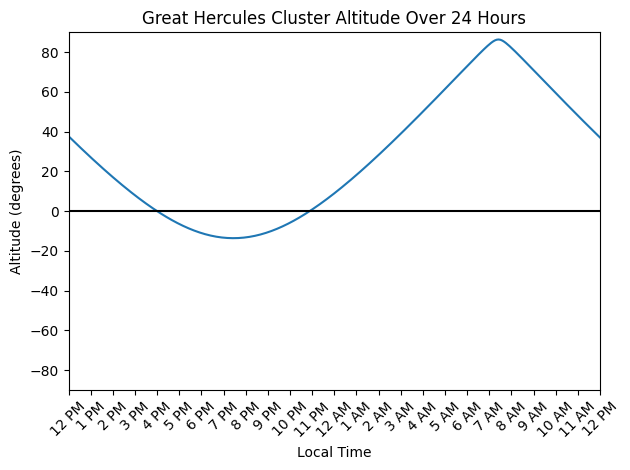

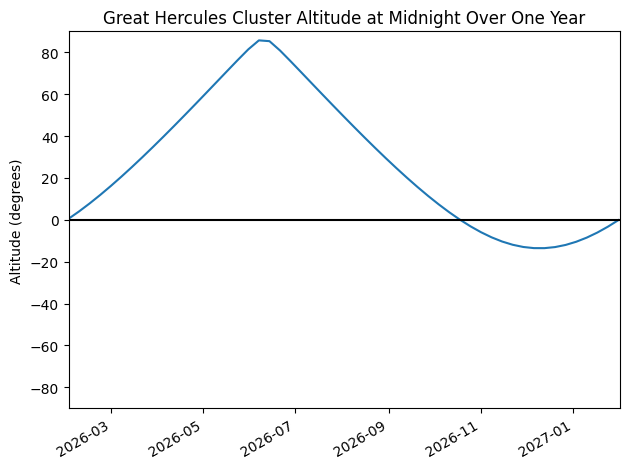

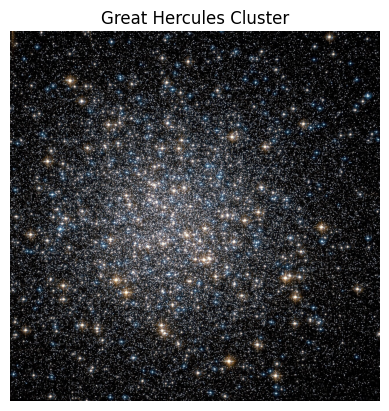

21.828931080640704

In [12]:
if __name__ == "__main__":
    obj = messier_13
    obs_date = "2026-02-16"
    obs_time = "23:58:00"
    latitude = 40.0
    longitude = -83.0
    utc_offset = -5
    altitude = calculate_altitude(
        obj,
        obs_date,
        obs_time,
        latitude,
        longitude,
        utc_offset
        )


    if altitude > 0:
        print(f"{obj.name} is {altitude:.2f}° above the horizon at {obs_time}")
    else:
        print(f"{obj.name} is {abs(altitude):.2f}° below the horizon at {obs_time}")

    plot_altitude_24hr(
        obj,
        obs_date,
        latitude,
        longitude,
        utc_offset
    )

    plot_altitude_year(
        obj,
        obs_date,
        latitude,
        longitude,
        utc_offset,
        step_days=7
    )
    if hasattr(obj, "image_url") and obj.image_url:
        try:
            req = Request(
                obj.image_url,
                headers={'User-Agent': 'Mozilla/5.0'}

            )

            with urlopen(req) as response:
                img = Image.open(response)
                plt.imshow(np.asarray(img))
                plt.axis('off')
                plt.title(obj.name)
                plt.show()

        except Exception as e:
            print(f"Could not load image: {e}")
    else:
        print("No image available.")

calculate_percent_fov(messier_31, eye_piece_40, Telescope_400)



# **AI**

#### **AI Implementation** 
In this section, we take our previously defined functions and pass them to an AI LLM chat bot. The specific LLM that we utilize is openai's ChatGPT-4.1-min. This bot can take a plain text input and covert it to the proper format for the functions, increasing ease of use for the user. We based the code for this section on the examples from Lecture 9 and Lecture 10 for light LLM implementation and passing functions to the AI to utilize.

Here we define the API key and the base URL for the AI chat bot. It prints a confirmation message if everything is correct.

In [13]:
# We will use this to suppress some warnings that are not important
# URL of Ohio State's LiteLLM proxy server
custom_api_base = "https://litellmproxy.osu-ai.org" 

# Our API key for Astronomy 1221 (keep this private to our class)
astro1221_key = os.getenv("ASTRO1221_API_KEY")
if astro1221_key:
    print("Successfully loaded Astronomy 1221 key")
else:
    print("Error: did not find key. Check that .env exists in the same folder/directory as your class notebooks")

# Check that .gitignore exists in this directory
if os.path.isfile('.gitignore'):
    print("Successfully found .gitignore in the current directory")
else:
    print("Error: Did not find .gitignore. Please download .gitignore from carmen and put in the same folder/directory as your class notebooks.")

with open('.gitignore', 'r') as f:
    content = f.read()
    if '.env' in content:
        print("Confirmed that .gitignore has the .env exclusion")
    else: 
        print("Error: Did not find .env in .gitignore. Please download .gitignore from carmen and put with your class notebooks.")


Successfully loaded Astronomy 1221 key
Successfully found .gitignore in the current directory
Confirmed that .gitignore has the .env exclusion


We first define how we want to contact the AI. We specify the message that is passed to the AI from the user, the module that we use, the temperature of the module, the max tokens that it can use, and the tools that it can use.

We start by ensuring that the inputs of the LLM are defined correctly, and flag the the incorrect input if they are not.

We then try to connect to the LLM server. The code responds if it is successful or not, and returns the response from the LLM.

In [14]:
def prompt_llm(messages, model="openai/GPT-4.1-mini", temperature=0, max_tokens=1000, tools=None, verbose=True):
    """
    Send a prompt or conversation to an LLM using LiteLLM and return the response.
    Exact function from Class 9 notebook.
    """
    if isinstance(messages, str):
        messages = [{"role": "user", "content": messages}]
    if not (isinstance(temperature, (int, float)) and 0 <= temperature <= 2):
        raise ValueError("temperature must be a float between 0 and 2 (inclusive).")
    if not (isinstance(max_tokens, int) and max_tokens > 0):
        raise ValueError("max_tokens must be a positive integer.")

    try: 
        print("Contacting LLM via University Server...")
        response = litellm.completion(
            model=model,
            messages=messages,
            tools=tools,
            api_base=custom_api_base,
            api_key=astro1221_key,
            temperature=temperature,
            max_tokens=max_tokens
        )
        answer = response['choices'][0]['message']['content']
        if verbose: 
            print(f"\nSUCCESS! Here is the answer from {model}:\n")
            print(answer)
    except Exception as e:
        print(f"\nERROR: Could not connect. Details:\n{e}")    
        response = None
    return response

We start by using the system prompt to tell the AI what it is expected to return. 

The user's message is then appended to the prompt, and the complete combined prompt is then sent to the LLM. 

The LLM then determines the tools needed to fulfill the user's request, and filters through the tool calls to run the functions that are needed.

The functions then return a response, and the image is requested from the class that the AI specifies. 

Finally, the AI presents the full response to the user.

Contacting LLM via University Server...

SUCCESS! Here is the answer from openai/GPT-4.1-mini:

None


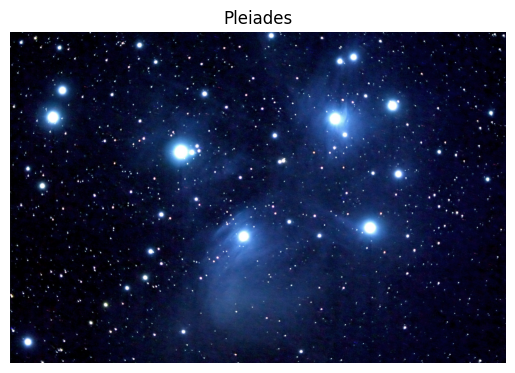

Contacting LLM via University Server...

SUCCESS! Here is the answer from openai/GPT-4.1-mini:

Messier 45 takes up approximately 21.63% of the field of view when using your Meade ETX 80mm f/5 telescope with a Plossl 40mm (43deg) eyepiece. If you have any other questions or need further assistance, feel free to ask!


In [16]:
# Prompt to test the connection


messages=[{"role": "system", "content": "You are an astronomy assistant. You have 2 jobs that you help users with. Job 1 is to calculate the height in the sky of a Messier object at a given time and place. Job 2 is to determine the percent of the user's FOV an object takes up based on their eyepiece and telescope. For Job 1, EVERY user request you MUST: 1. Call calculate_altitude 2. Call plot_altitude_year 3. Call plot_altitude_24hr All three tool calls must be made in the same response. Do NOT skip any tool. After the tools return results, provide the final formatted answer. Failure to call all three tools is incorrect behavior. For Job 2: Calculate the percentage of the sky that an astronomical object takes up given the users telescope and eyepiece. You MUST call calculate_percent_fov and provide the final formatted answer."}]

#messages.append({"role": "user", "content": "I want to observe messier 82 on 2026-02-18 at 23:00:00. My latitude is 39.963120 degrees north, my longitude is 83.367928 degrees west and my utc offset is -5 hours."})
#messages.append({"role": "user", "content": "Please answer in the form with no other text: [Object] is [blank] degrees above/below the horizon."})

messages.append({"role": "user", "content": "I want to find the percent FOV that Messier 45 takes up when using my Meade ETX 80mm f/5 and Plossl 40mm (43deg)"})

# Step 2: Call the LLM with the tools schema defined
response = prompt_llm(messages, tools=tools) 
message = response.choices[0].message
if message.tool_calls:

    messages.append(message)

    for tool_call in message.tool_calls:

        function_name = tool_call.function.name
        args = json.loads(tool_call.function.arguments)

        obj_key = args.get("obj") or args.get("object")
        obj = astro_objects[obj_key]
        eyepiece_used = eye_piece[args["eyepiece"]] if "eyepiece" in args else None
        telescope_used = telescopes[args["telescope"]] if "telescope" in args else None

        if function_name == "calculate_altitude":

            height = calculate_altitude(
                obj,
                args["obs_date"],
                args["obs_time"],
                args["latitude_deg"],
                args["longitude_deg"],
                args["utc_offset"]
            )

            messages.append({
                "role": "tool",
                "tool_call_id": tool_call.id,
                "name": function_name,
                "content": json.dumps(height)
            })


        elif function_name == "plot_altitude_year":

            plot_altitude_year(
                obj,
                args["obs_date"],
                args["latitude_deg"],
                args["longitude_deg"],
                args["utc_offset"]
            )

            messages.append({
                "role": "tool",
                "tool_call_id": tool_call.id,
                "name": function_name,
                "content": json.dumps("Year plot generated.")
            })


        elif function_name == "plot_altitude_24hr":

            plot_altitude_24hr(
                obj,
                args["obs_date"],
                args["latitude_deg"],
                args["longitude_deg"],
                args["utc_offset"]
            )

            messages.append({
                "role": "tool",
                "tool_call_id": tool_call.id,
                "name": function_name,
                "content": json.dumps("24hr plot generated.")
            })

        elif function_name == "calculate_percent_fov":

            percent = calculate_percent_fov(obj, eyepiece_used, telescope_used)

            messages.append({
                "role": "tool",
                "tool_call_id": tool_call.id,
                "name": function_name,
                "content": json.dumps(percent)
            })
    if hasattr(obj, "image_url") and obj.image_url:
        try:
            req = Request(
                obj.image_url,
                headers={'User-Agent': 'Mozilla/5.0'}
            )

            with urlopen(req) as response:
                img = Image.open(response)
                plt.imshow(np.asarray(img))
                plt.axis('off')
                plt.title(obj.name)
                plt.show()

        except Exception as e:
            print(f"Could not load image: {e}")
    else:
        print("No image available.")



    final_response = prompt_llm(messages, tools=tools)